<a href="https://colab.research.google.com/github/Mdhasim-tech/Machine-learning/blob/main/Pre_pruning_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# loading the iris dataset
iris=sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
# Label encoding the species label
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
iris['species']=encoder.fit_transform(iris['species'])
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [4]:
# Train test split
X=iris.drop('species',axis=1)
y=iris['species']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
# Fitting the dicision tree without any pruning
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [6]:
# Prediction time
y_pred=dt.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [7]:
# Evaluating the model
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
#Check out accuracy is 1 that means model is overfitting->poor generalization->most probably will give wrong answer to new unseen data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


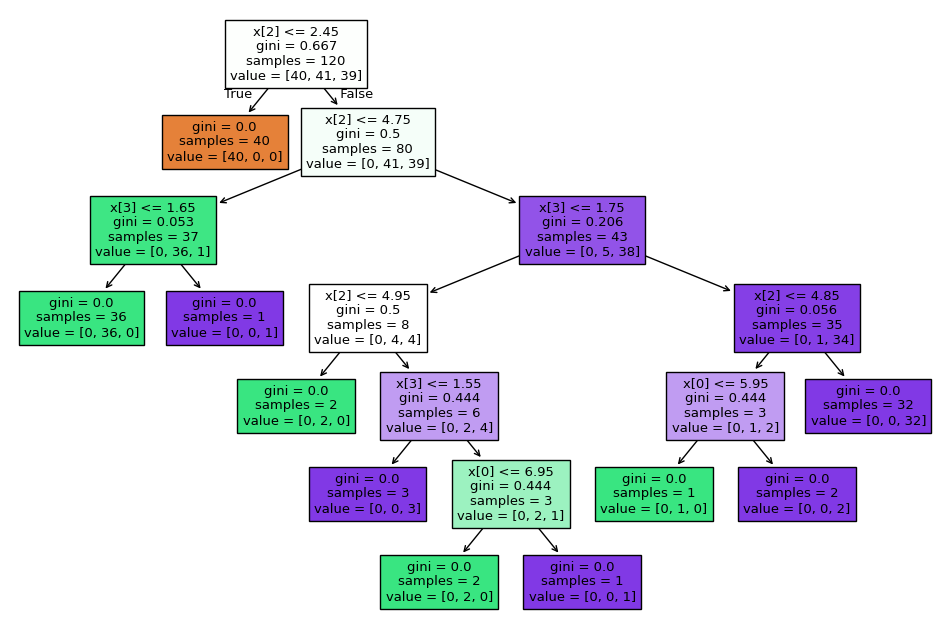

In [8]:
# Lets visualize it using matplotlib
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plot_tree(dt,filled=True)
plt.show()

In [13]:
#Lets now prune it to make our tree look better and perform better more importantly!
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': [None, 'sqrt', 'log2'],  # removed 'auto', added None
    'max_depth': [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
}
# Hypertuning the model using GridSearchCV to get the best parameters
grid_search=GridSearchCV(estimator=dt,param_grid=param_grid,cv=5,scoring="accuracy")
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': [None, 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [14]:
# Lets check out the best parameters for our model
print(grid_search.best_params_)
print(grid_search.best_score_)  # Check out the accuracy is 0.9583333333333334 -->model is generalizing well -->makes good prediction for new unseen data

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'splitter': 'random'}
0.9583333333333334


In [15]:
# Prediction time
y_pred=grid_search.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


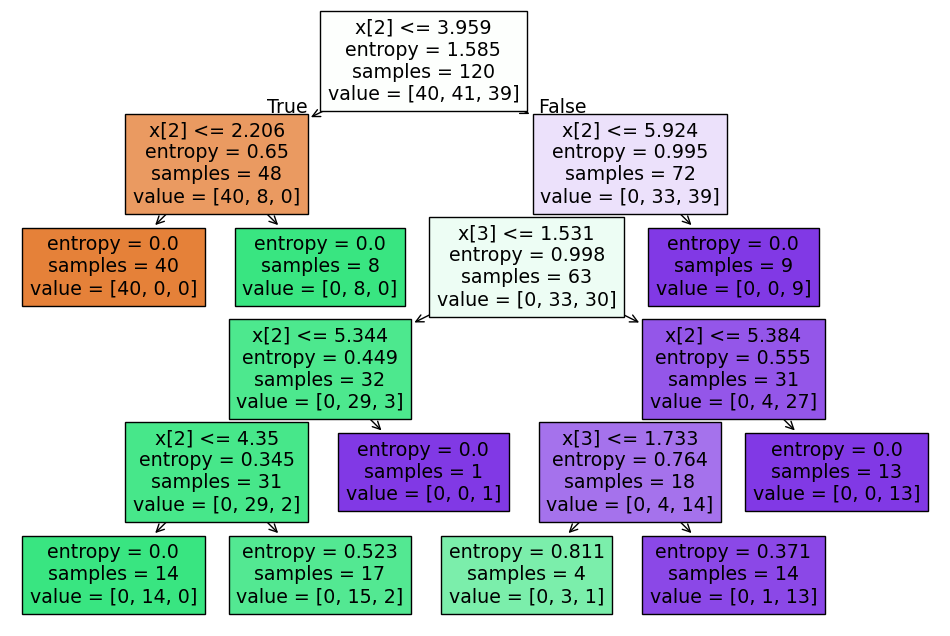

In [17]:
# Lets visualize it
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plot_tree(grid_search.best_estimator_,filled=True)
plt.show()